<a href="https://colab.research.google.com/github/iron59zug/YFapi/blob/master/MACD_EURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# learn to plot MACD with py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
up1 = files.upload()
#up2 = files.upload()
#up3 = files.upload()
#up4 = files.upload()
#up5 = files.upload()
STs=12
LTs=26
SLs=9
fsx=36; fsy=6
#fsxy="figsize=($fsx,$fsy)"

Saving EURN.2016.csv to EURN.2016.csv


In [3]:
# data frame
df = pd.read_csv('EURN.2016.csv')
#
###-----------> df['date']=df['time'].dt.date
df = df.set_index(pd.DatetimeIndex(df['time'].values))
df.rename(columns={'EURONAV':'eurn', 'EURONAV( volume )':'vol.'}, inplace=True)
#print("\n df test")
#df.head(5)
#df.tail(10)
# ALL: 3976 rows; >2016: 1147 rows
df

,time,eurn,vol.
2015-12-31 01:00:00,2015-12-31 01:00,12.680,160006
2016-01-04 01:00:00,2016-01-04 01:00,12.440,371028
2016-01-05 01:00:00,2016-01-05 01:00,12.080,440638
2016-01-06 01:00:00,2016-01-06 01:00,11.865,273827
2016-01-07 01:00:00,2016-01-07 01:00,11.525,658114
...,...,...,...
2020-06-22 02:00:00,2020-06-22 02:00,7.480,1130204
2020-06-23 02:00:00,2020-06-23 02:00,7.510,1440519
2020-06-24 02:00:00,2020-06-24 02:00,7.255,1340558
2020-06-25 02:00:00,2020-06-25 02:00,7.210,1256838


In [4]:
# ct = pd.crosstab(df.xxx, df.yyy, normalize='index')*100
# ct = ct.drop(columns=['vol.'])
#ct = --->df['index'],<--- df['time'], df['€URN']
# datetime = ct['time'].tolist()
#ct

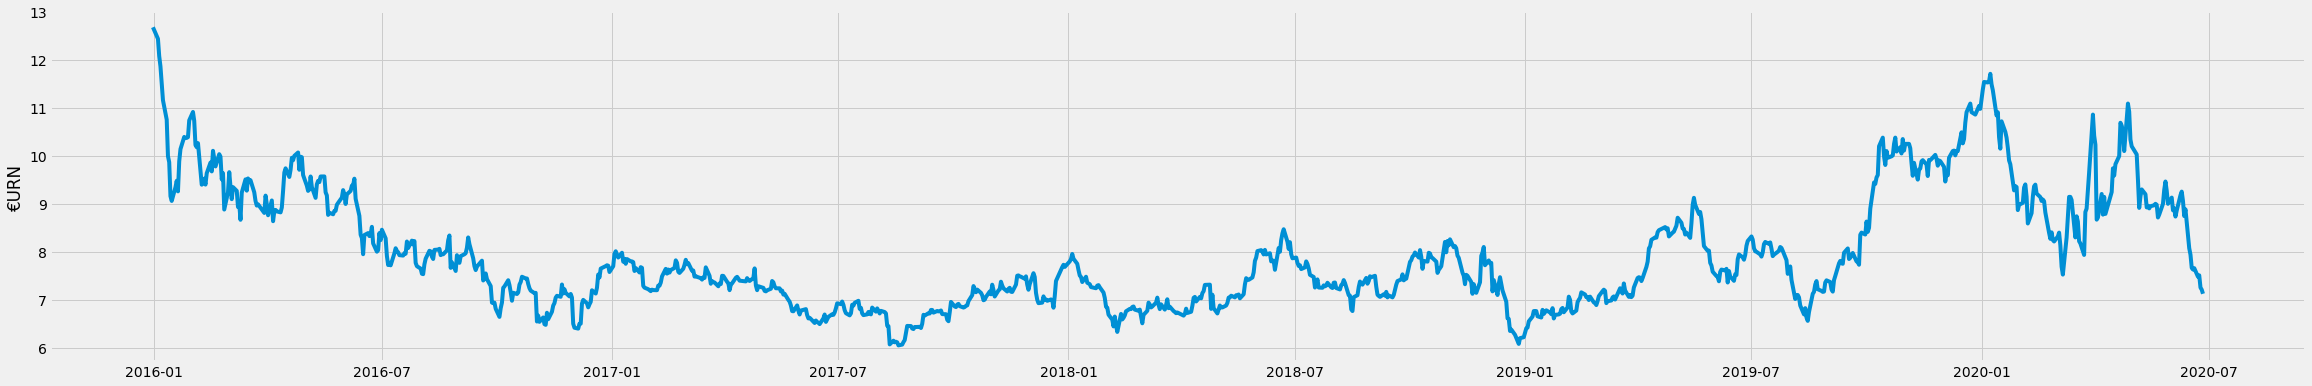

In [5]:
plt.style.use('fivethirtyeight')
#fig, ax = plt.subplots(figsize=(1,1))
#ax1 = sns.lineplot(x=ct['index'].tolist(), y=ct['€URN'].tolist())
plt.figure(figsize=(fsx, fsy))
plt.plot(df['eurn'])
plt.ylabel('€URN'); #plt.xlabel('date')
plt.show()

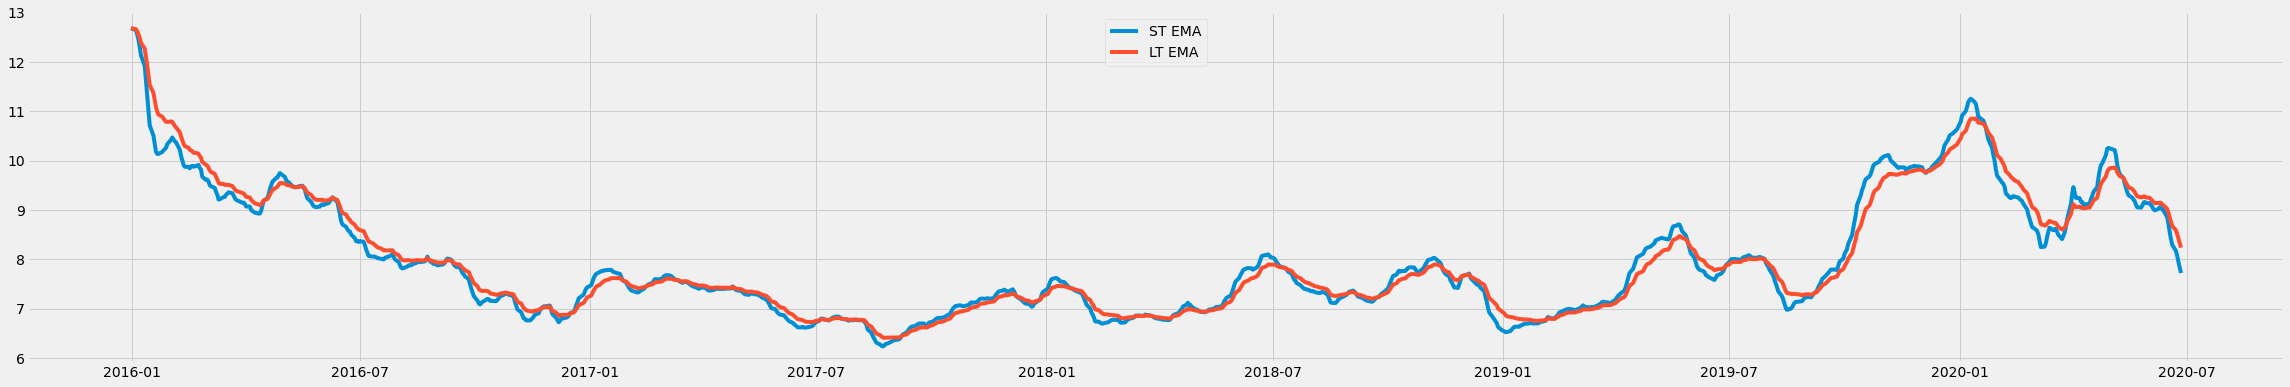

In [6]:
# Exponential Moving Average, EMAs
SEMA = df.eurn.ewm(span=STs, adjust=False).mean()
LEMA = df.eurn.ewm(span=LTs, adjust=False).mean()
plt.figure(figsize=(fsx, fsy))
plt.plot(df.index, SEMA, label='ST EMA')
plt.plot(df.index, LEMA, label='LT EMA')
plt.legend(loc='upper center')
plt.show()

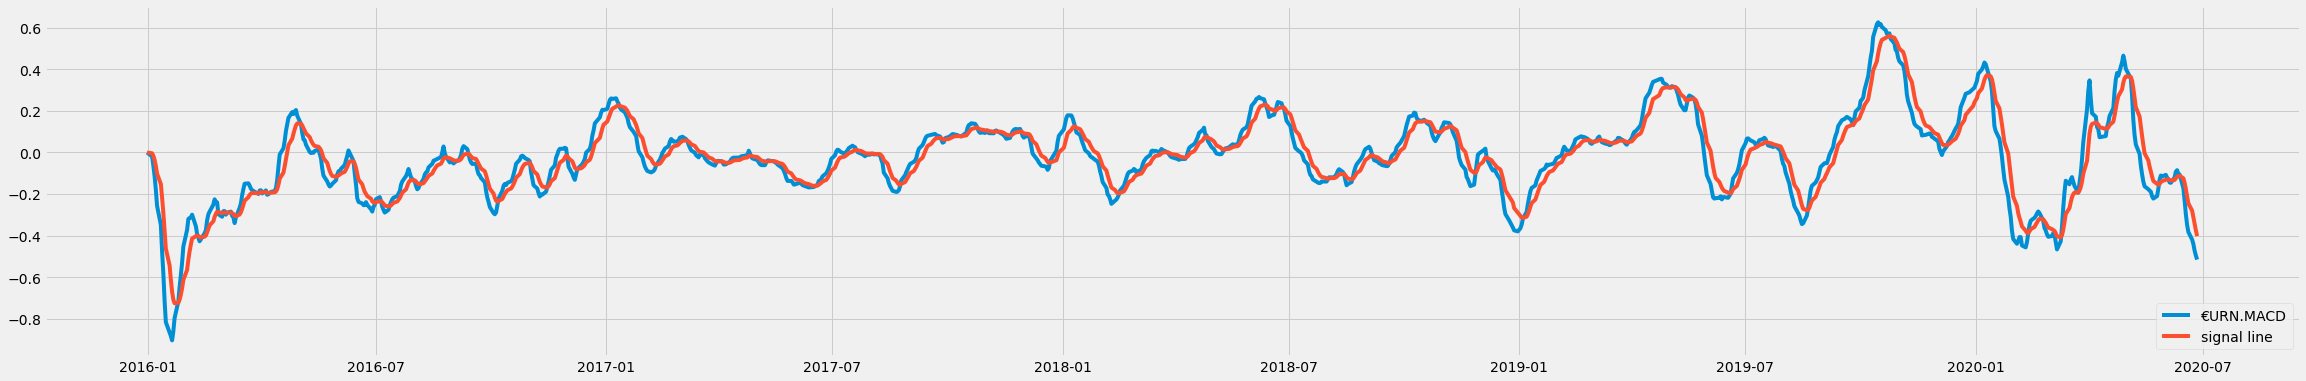

In [7]:
MACD = SEMA - LEMA
SL = MACD.ewm(span=SLs, adjust=False).mean()
plt.figure(figsize=(fsx,fsy))
plt.plot(df.index, MACD, label='€URN.MACD')
#ax1 = sns.lineplot(x=df.index, y=SL)
plt.plot(df.index, SL, label='signal line')
plt.legend(loc='lower right')
plt.show()
df['MACD']=MACD; df['SL']=SL; 
#df

In [8]:
def bos(line):
  Buy=[]
  Sell=[]
  flag=-1
  for i in range(0, len(SL)):
    if line['MACD'][i] > line['SL'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(line['eurn'][i])
        flag = 1
      else: 
        Buy.append(np.nan)
    elif line['MACD'][i] < line['SL'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(line['eurn'][i])
        flag = 0
      else: 
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

bosc=bos(df)
df['Bprice'] = bosc[0]
df['Sprice'] = bosc[1]
#df

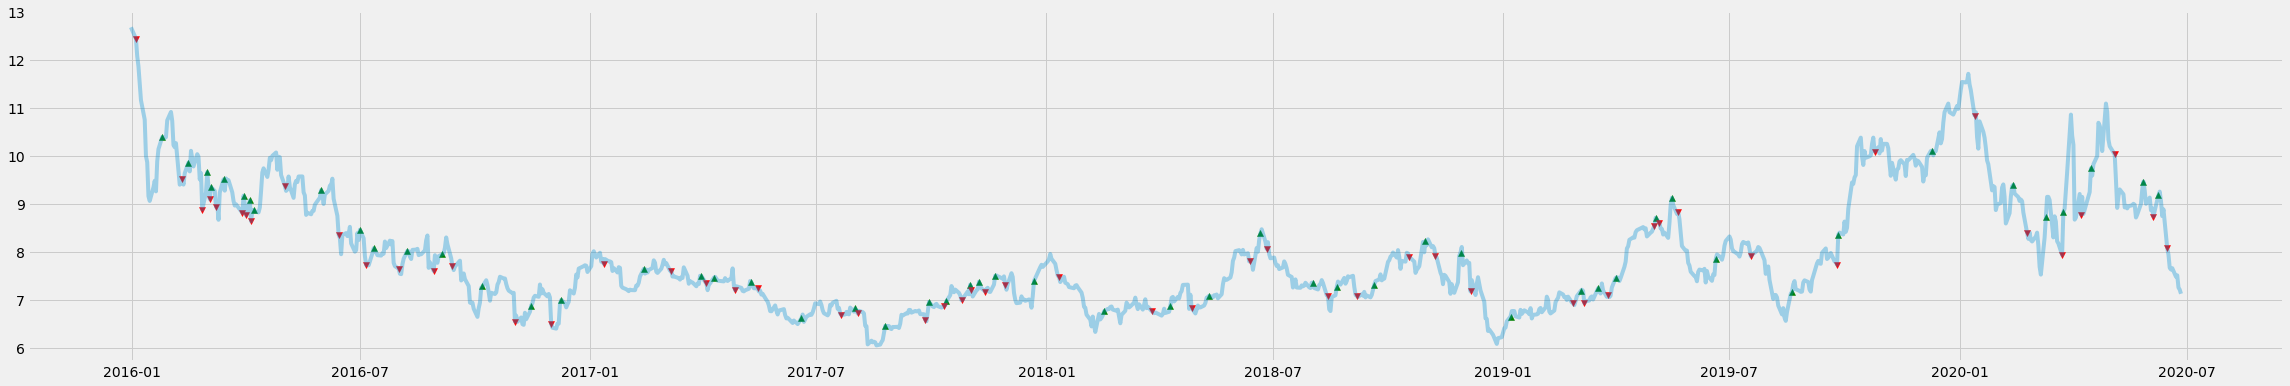

In [9]:
plt.figure(figsize=(fsx, fsy))
plt.scatter(df.index, df['Bprice'], color='green', label='B', marker='^', alpha=1)
plt.scatter(df.index, df['Sprice'], color='red', label='S', marker='v', alpha=1)
plt.plot(df['eurn'], alpha=0.35)
plt.show()
